<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW4_zGermain/MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [3]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

The force of gravity is $F=\frac{GMm(r)}{r^2}$, where $M$ is the rotating mass and $m(r)$ is the mass within the radius r, between the system center and rotating body. The net force experienced by a rotating body is $F_{net}=\frac{Mv^2}{r}$ where M is the rotating bodies mass,v is its orbital speed and r the distance from system center to the rotating body. We assume that the only significant force felt by the rotating body is the force of gravity. Thus, we have $\frac{Mv^2}{r}=\frac{GMm(r)}{r^2}$. We can then multiply both sides by $\frac{r}{m}$ arriving at the solution for the square of the orbital speed: $v^2=\frac{Gm(r)}{r}$.

## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [0]:
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv')
m31.columns = ['r','v','dv','err']
m31 = m31.drop([0],axis=0);

In [5]:

m31.head()

,r,v,dv,err
1,0.100,183.939,0.000,0.000
2,0.120,190.710,10.265,12.191
3,0.144,204.141,22.634,21.808
4,0.173,207.601,4.573,4.200
5,0.207,210.188,3.943,3.258


In [6]:
m31.describe()

,r,v,dv,err
count,55,55,55,55
unique,55,55,55,55
top,0.299,121.974,22.599,1.989
freq,1,1,1,1


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [0]:
apparentSizeM31 = 3.167 #deg
distanceM31 = 778 #kpc 
distUncertM31 = 33

In [8]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [0]:
#Wikipedia has the distance listed in Kpc

In [11]:
m31distKpc = distanceM31 * u.kpc
print("Size of the visible component of Andromeda: {:.2f}".format(m31distKpc) )

Size of the visible component of Andromeda: 778.00 kpc


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


In [54]:
m31sizeKpc = (m31angS.to(u.rad) * m31distKpc) / u.rad / 2
m31sizeKpcUncert = m31sizeKpc * ( (distUncertM31 * u.kpc) / m31distKpc )
print(m31sizeKpc)
print(m31sizeKpcUncert)

21.5018106127469 kpc
0.9120305272758968 kpc


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [55]:
m31NotLum = m31[pd.to_numeric(m31['r']) > (m31sizeKpc / u.kpc)]
m31NotLum.head()

,r,v,dv,err
31,23.738,236.511,11.729,1.580
32,28.485,232.335,16.577,2.106
33,34.182,233.530,27.353,3.826
34,41.019,230.444,52.432,9.815
35,49.222,237.069,109.381,23.924


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [0]:
def getradii(gal, gsize, n):
  '''
  getradii  gets information for the first piece of data with a radius greater than N*gize
  Inputs:
    gal  dataframe for galaxy
    gsize  radius of extension for luminous mass
    n  integer value
  Outputs:
    r  least radius greater than N*gsize
    dr  uncertainty in radius
    v  velocity at r
    dv  uncertainty, dv, in v
    err  total uncertainty in v, err
  '''
  for index, row in gal.iterrows():
    if (pd.to_numeric(row.r) > (n * gsize / u.kpc) ):
      #Miscalculated, wrong by a factor Gm(r). Do not know how to get m(r)
      dr = 2*(pd.to_numeric(row.v)**-3)*pd.to_numeric(row.dv);
      return pd.to_numeric(row.r), dr, pd.to_numeric(row.v), pd.to_numeric(row.dv), pd.to_numeric(row.err)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

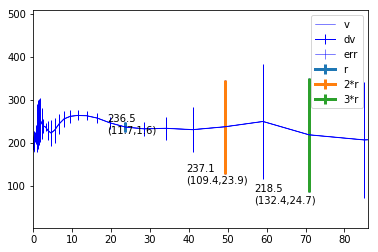

In [57]:
def plotGal(gal, rds):
    '''
    plotGal  produces galaxy rotation curve(GRC)
    Inputs:
      gal  dataframe for galaxy
      rds  radius of extension for luminous mass
    Outputs:
      ax  plot of GRC, includes error bars and N=1,2,3
    '''
    ax = pl.figure().add_subplot(1,1,1)
    pl.errorbar(pd.to_numeric(gal.r), pd.to_numeric(gal.v), yerr=pd.to_numeric(gal.dv), color='blue',lw=1)
    #pl.errorbar(pd.to_numeric(gal.r), pd.to_numeric(gal.v), yerr=pd.to_numeric(gal.err), color='red',lw=1) would make error bars different
    pl.errorbar(pd.to_numeric(gal.r), pd.to_numeric(gal.v), yerr=pd.to_numeric(gal.err), color='blue',lw=0.5)
    pl.plot(pd.to_numeric(gal.r), pd.to_numeric(gal.v), color='blue',lw=0.5) #unnecessary?
    pl.xlim(0,4*(rds/u.kpc))
    for i in range(1,4):
      r, dr, v, dv, err = getradii(gal,rds,i)
      pl.errorbar(r,v,yerr=dv,lw=3)
      pl.text(r-0.2*r,v-1.2*dv,"{:.1f}\n({:.1f},{:.1f})".format(v,dv,err))
    pl.legend( ("v","dv", "err", "r", "2*r", "3*r") )
plotGal(m31, m31sizeKpc)

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [0]:
def vratios(gal, rds, N, errType):
  '''
  vratios  determines 2-sigma test
  Inputs:
    gal  dataframe of galaxy rotation curve
    rds  luminous radius
    N  integer for multiple or rds
    errType  String: 'dv' or 'err'
  Outputs:
    prints expected ration based on radii
    prints calculated ratio using v and errType
    prints 2-sigma limits
    prints Is expected ratio within calculated ratio?
  '''
  minR, drMinR, vMinR, dvMinR, errMinR = getradii(gal,rds,1);
  NR, drNR, vNR, dvNR, errNR = getradii(gal,rds,N);
  expRatioR = NR/minR;
  print("The velocity squared at around {} times the radius, is expected to decrease by a factor of {:.3}.".format(N,expRatioR));
  calcRatioV = (vNR/vMinR);
  if (errType=='dv'):
    calcRatioUncertV = (calcRatioV)*np.sqrt( (dvMinR/vMinR)**2 * (dvNR/vNR)**2 );
  elif (errType=='err'):
    calcRatioUncertV = (calcRatioV)*np.sqrt( (errMinR/vMinR)**2 * (errNR/vNR)**2 );
  else:
    print("This is wrong.");
  calcRatioUncertV = 2*calcRatioV*calcRatioUncertV;
  calcRatioV = calcRatioV**2;
  print( "The velocity squared at around {} times the radius, is calculated to have decreased by ".format(N)
       + "{:.3f} with uncertainty {:.3f} which is {}.".format(calcRatioV, calcRatioUncertV, errType) );
  lowLim2Sigma = calcRatioV - 2 * calcRatioUncertV;
  uppLim2Sigma = calcRatioV + 2 * calcRatioUncertV;
  print( "The lower limit is {:.3f} and the upper limit is {:.3f}.".format(lowLim2Sigma, uppLim2Sigma) )
  if ( (expRatioR >= lowLim2Sigma) and (expRatioR <= uppLim2Sigma) ):
    print("The calculated velocity sqaured is not significantly different than the expected velocty squared at "
         + "around {} times the radius.\n".format(N));
  else:
    print("The calculated velocity squared is significantly different than the expected velocity squared at "
         + "around {} times the radius.\n".format(N));

In [61]:
for i in range(1,38):
  vratios(m31, m31sizeKpc, i, 'dv')
for i in range(1,38):
  vratios(m31, m31sizeKpc, i, 'err')

The velocity squared at around 1 times the radius, is expected to decrease by a factor of 1.0.
The velocity squared at around 1 times the radius, is calculated to have decreased by 1.000 with uncertainty 0.005 which is dv.
The lower limit is 0.990 and the upper limit is 1.010.
The calculated velocity sqaured is not significantly different than the expected velocty squared at around 1 times the radius.

The velocity squared at around 2 times the radius, is expected to decrease by a factor of 2.07.
The velocity squared at around 2 times the radius, is calculated to have decreased by 1.005 with uncertainty 0.046 which is dv.
The lower limit is 0.913 and the upper limit is 1.097.
The calculated velocity squared is significantly different than the expected velocity squared at around 2 times the radius.

The velocity squared at around 3 times the radius, is expected to decrease by a factor of 2.99.
The velocity squared at around 3 times the radius, is calculated to have decreased by 0.853 wi

### Discuss!

Comparing the expected ratios of velocities to the calculated ratios and their uncertainties within 2-sigma, I found that there is a significant difference between the velocity ratio that was expected and the calculated velocity with 95% confidence. I have rejected the null hypothesis that the gravitational force due to the luminous mass in the Andromeda galaxy is the only force on orbiting stars outside the luminous radius. Thus, I have failed to reject the hypothesis that there is other, non-luminous, mass in the Andromeda galaxy.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [52]:
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv');
mw.columns = ['r','v','dv','err'];
mw = mw.drop([0],axis=0);
mw.head()

,r,v,dv,err
1,0.010,119.061,41.832,32.714
2,0.012,115.268,35.199,17.100
3,0.014,117.392,35.152,14.429
4,0.017,118.475,35.252,14.870
5,0.021,110.386,33.817,14.427


In [53]:
mw.describe()

,r,v,dv,err
count,64,64,64,64
unique,64,64,64,64
top,0.128,175.414,35.325,31.909
freq,1,1,1,1


In [63]:
mwsizeKpc = 53.5 * u.kpc
mwsizeKpcUncert = 7.5 *u.kpc
print(mwsizeKpc)
print(mwsizeKpcUncert)
mwNotLum = mw[pd.to_numeric(mw['r']) > (mwsizeKpc / u.kpc)]
mwNotLum.head()

53.5 kpc
7.5 kpc


,r,v,dv,err
49,63.198,177.979,47.004,16.345
50,75.837,187.898,49.195,16.343
51,91.005,179.697,62.587,20.907
52,109.205,155.444,77.128,28.516
53,131.047,128.756,88.515,39.433


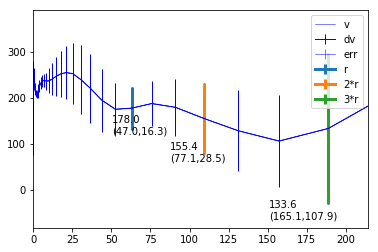

In [64]:
plotGal(mw, mwsizeKpc)

In [67]:
for i in range(1,7):
  vratios(mw, mwsizeKpc, i, 'dv')
for i in range(1,7):
  vratios(mw, mwsizeKpc, i, 'err')

The velocity squared at around 1 times the radius, is expected to decrease by a factor of 1.0.
The velocity squared at around 1 times the radius, is calculated to have decreased by 1.000 with uncertainty 0.139 which is dv.
The lower limit is 0.721 and the upper limit is 1.279.
The calculated velocity sqaured is not significantly different than the expected velocty squared at around 1 times the radius.

The velocity squared at around 2 times the radius, is expected to decrease by a factor of 1.73.
The velocity squared at around 2 times the radius, is calculated to have decreased by 0.763 with uncertainty 0.200 which is dv.
The lower limit is 0.363 and the upper limit is 1.163.
The calculated velocity squared is significantly different than the expected velocity squared at around 2 times the radius.

The velocity squared at around 3 times the radius, is expected to decrease by a factor of 2.99.
The velocity squared at around 3 times the radius, is calculated to have decreased by 0.564 wi

Again, I found that the expected square ratio of the velocities to be significantly different from those calculated with 95% confidence. Thus, I'm able to reject the hypothesis that the orbiting systems of the Milky Way experience a gravitational force comprised of only luminous mass.